In [139]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [94]:
exp_root = '../Exp'
best_result = 'result/best'
result_1 = 'result_1'
ground_truth     = 'gt.npy'
predictions      = 'pred.npy'
confidence       = 'conf.npy'
all_confidence   = 'all_conf.npy'
all_predictions  = 'all_pred.npy'
confusion_matrix = 'conf_mtx.npy'

shapenetpart_exp = os.path.join(exp_root, 'shapenetpart')

# Training model from scratch
shapenetpart_exp5 = os.path.join(shapenetpart_exp, 'p2p_ResNet-18_exp5')

# Transfer learning for model trained on ModelNet40
# Image model parameters are frozen
shapenetpart_exp4 = os.path.join(shapenetpart_exp, 'p2p_ResNet-18_exp4')

# Transfer learning for model trained on ModelNet40
# Encoder and image model parameters are frozen 
shapenetpart_exp3 = os.path.join(shapenetpart_exp, 'p2p_ResNet-18_exp3')

shapenetcore_exp = os.path.join(exp_root, 'shapenetcore')

# Training model from scratch
shapenetcore_exp1 = os.path.join(shapenetcore_exp, 'p2p_ResNet-18_exp1')

# Transfer learning for model trained on ModelNet40
# Image model parameters are frozen
shapenetcore_exp2 = os.path.join(shapenetcore_exp, 'p2p_ResNet-18_exp2')

# Transfer learning for model trained on ModelNet40
# Encoder and image model parameters are frozen 
shapenetcore_exp3 = os.path.join(shapenetcore_exp, 'p2p_ResNet-18_exp3')

In [84]:
shapenetpart_keys = ['airplane', 'bag', 'cap', 'car', 'chair', 'earphone', 'guitar', 'knife', 'lamp', 'laptop', 'motor', 'mug', 'pistol', 'rocket', 'skateboard', 'table']
shapenetcore_keys = ['airplane', 'trash bin', 'bag', 'basket', 'bathtub', 'bed', 'bench', 'bicycle', 'birdhouse', 'bookshelf', 'bottle', 'bowl', 'bus', 'cabinet', 'camera', 'can', 'cap', 'car', 'chair', 'clock', 'keyboard', 'dishwasher', 'display', 'earphone', 'faucet', 'file cabinet', 'guitar', 'helmet', 'jar', 'knife', 'lamp', 'laptop', 'loudspeaker', 'mailbox', 'microphone', 'microwaves', 'motorbike', 'mug', 'piano', 'pillow', 'pistol', 'flowerpot', 'printer', 'remote', 'rifle', 'rocket', 'skateboard', 'sofa', 'stove', 'table', 'telephone', 'tower', 'train', 'watercraft', 'washer']

## ShapeNetPart results

### Validation accuracy

[0.0 98.3298]
[1.0 98.4342]
[2.0 95.755]
[0.0 94.2449]
[1.0 95.4752]
[2.0 91.9264]


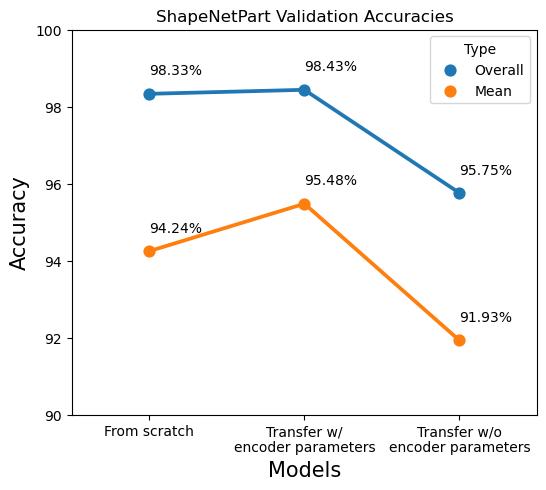

In [177]:
test_overall_accs = [98.3298, 98.4342, 95.7550]
test_mean_accs = [94.2449, 95.4752, 91.9264]
labels = ['From scratch', 'Transfer w/\nencoder parameters', 'Transfer w/o\nencoder parameters']

plt.figure(figsize=(6,5))

data = {"Model": labels + labels,
        "Accs": test_overall_accs + test_mean_accs,
        "Type": ['Overall', 'Overall', 'Overall', 'Mean', 'Mean', 'Mean']}

df = pd.DataFrame(data, columns=['Model', 'Accs', 'Type'])

plots = sns.pointplot(x="Model", y="Accs", hue='Type', data=df)

# Iterating over the bars one-by-one
for coll in plots.collections:
    for point in coll.get_offsets():
        print(point)
        plots.annotate("{:.2%}".format(point[1]/100), point+[0,0.5])

plt.title("ShapeNetPart Validation Accuracies")

# Setting the x-acis label and its size
plt.xlabel("Models", size=15)
 
# Setting the y-axis label and its size
plt.ylabel("Accuracy", size=15)

plt.ylim(90, 100)

plt.show()

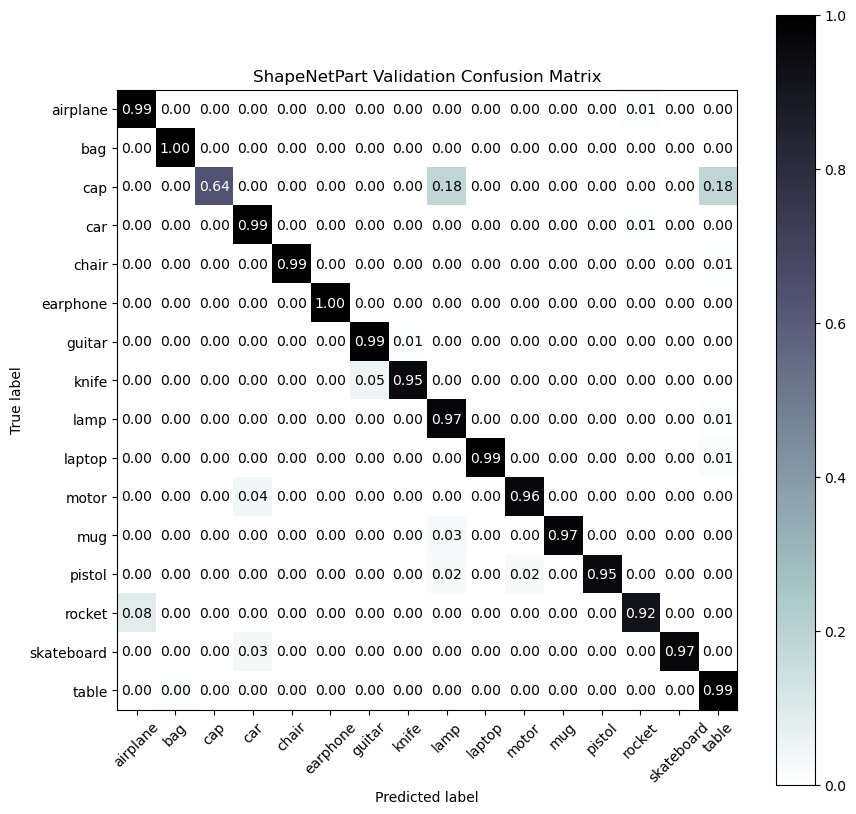

In [193]:
exp4_conf_mtx = np.load(os.path.join(shapenetpart_exp4, best_result, confusion_matrix))
exp4_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = exp4_conf_mtx, display_labels = shapenetpart_keys)
exp4_cm_display.plot(cmap='bone_r',values_format='.2f',xticks_rotation=45)
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('ShapeNetPart Validation Confusion Matrix')
plt.show()

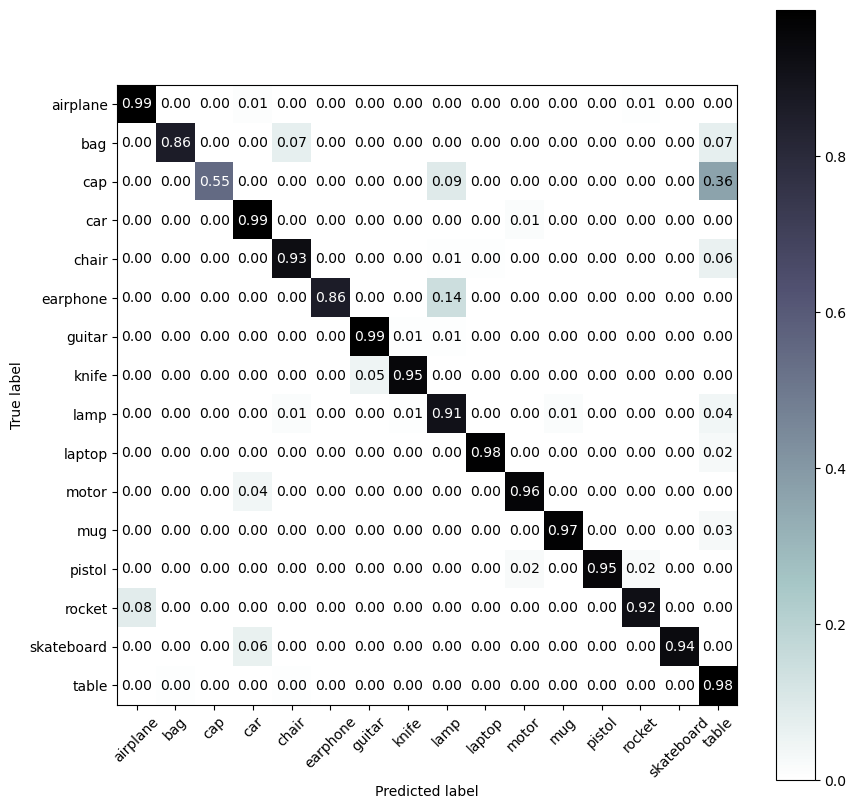

In [23]:
exp3_conf_mtx = np.load(os.path.join(shapenetpart_exp3, best_result, confusion_matrix))
exp3_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = exp3_conf_mtx, display_labels = shapenetpart_keys)
exp3_cm_display.plot(cmap='bone_r',values_format='.2f',xticks_rotation=45)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

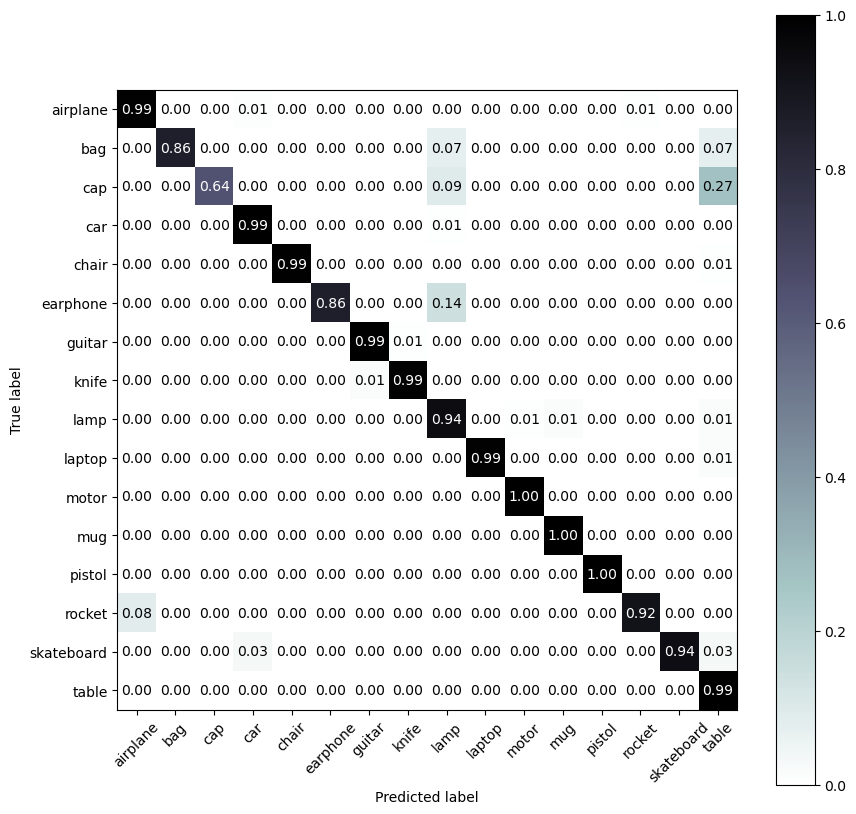

In [24]:
exp5_conf_mtx = np.load(os.path.join(shapenetpart_exp5, best_result, confusion_matrix))
exp5_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = exp5_conf_mtx, display_labels = shapenetpart_keys)
exp5_cm_display.plot(cmap='bone_r',values_format='.2f',xticks_rotation=45)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## ShapeNetCore results

### Validation accuracy

[0.0 85.2662]
[1.0 86.1374]
[2.0 84.5885]
[0.0 62.9223]
[1.0 66.5649]
[2.0 62.8224]


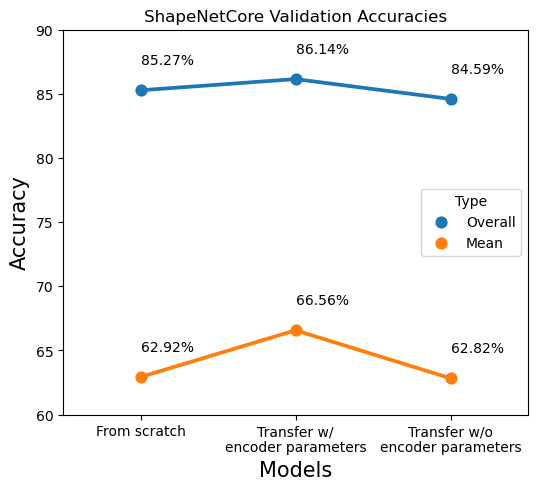

In [176]:
test_overall_accs = [85.2662, 86.1374, 84.5885]
test_mean_accs = [62.9223, 66.5649, 62.8224]
labels = ['From scratch', 'Transfer w/\nencoder parameters', 'Transfer w/o\nencoder parameters']

plt.figure(figsize=(6,5))

data = {"Model": labels + labels,
        "Accs": test_overall_accs + test_mean_accs,
        "Type": ['Overall', 'Overall', 'Overall', 'Mean', 'Mean', 'Mean']}

df = pd.DataFrame(data, columns=['Model', 'Accs', 'Type'])

plots = sns.pointplot(x="Model", y="Accs", hue='Type', data=df)

# Iterating over the bars one-by-one
for coll in plots.collections:
    for point in coll.get_offsets():
        print(point)
        plots.annotate("{:.2%}".format(point[1]/100), point+[0,2])

plt.title("ShapeNetCore Validation Accuracies")

# Setting the x-acis label and its size
plt.xlabel("Models", size=15)
 
# Setting the y-axis label and its size
plt.ylabel("Accuracy", size=15)

plt.ylim(60, 90)

plt.show()

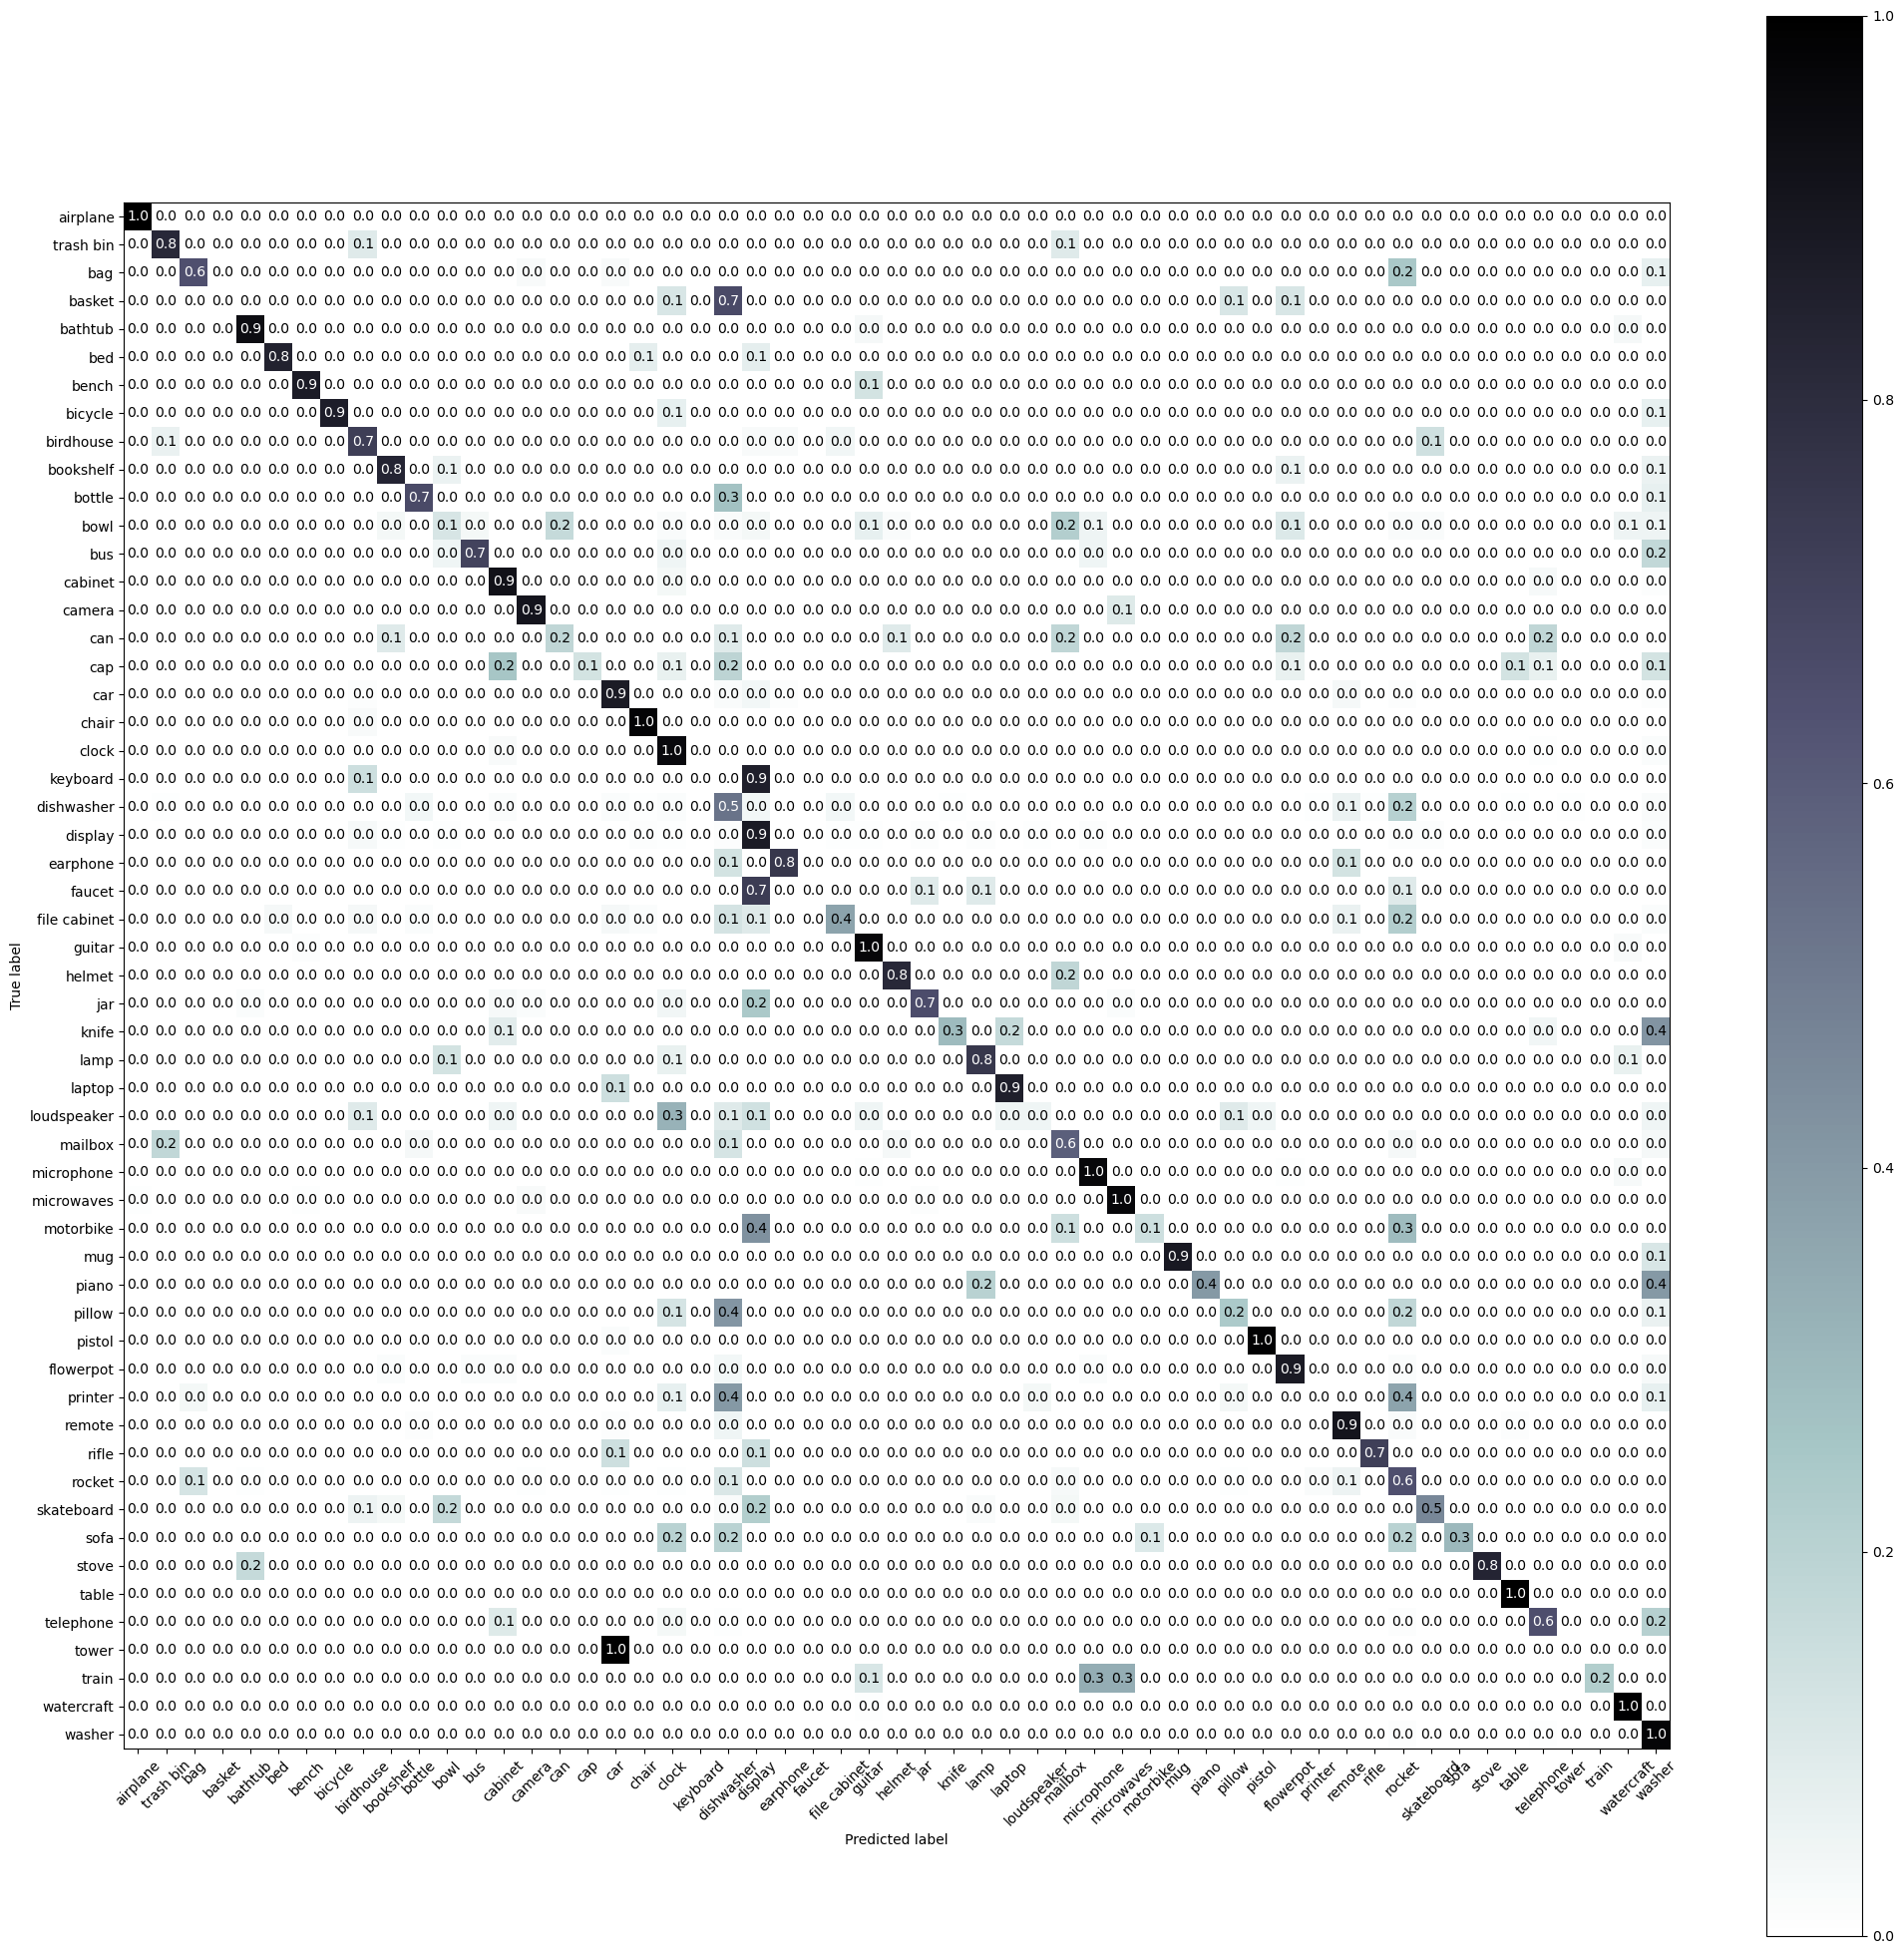

In [28]:
exp1_conf_mtx = np.load(os.path.join(shapenetcore_exp1, best_result, confusion_matrix))
exp1_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = exp1_conf_mtx, display_labels = shapenetcore_keys)
exp1_cm_display.plot(cmap='bone_r',values_format='.1f',xticks_rotation=45)
plt.rcParams['figure.figsize'] = [25, 25]
plt.show()

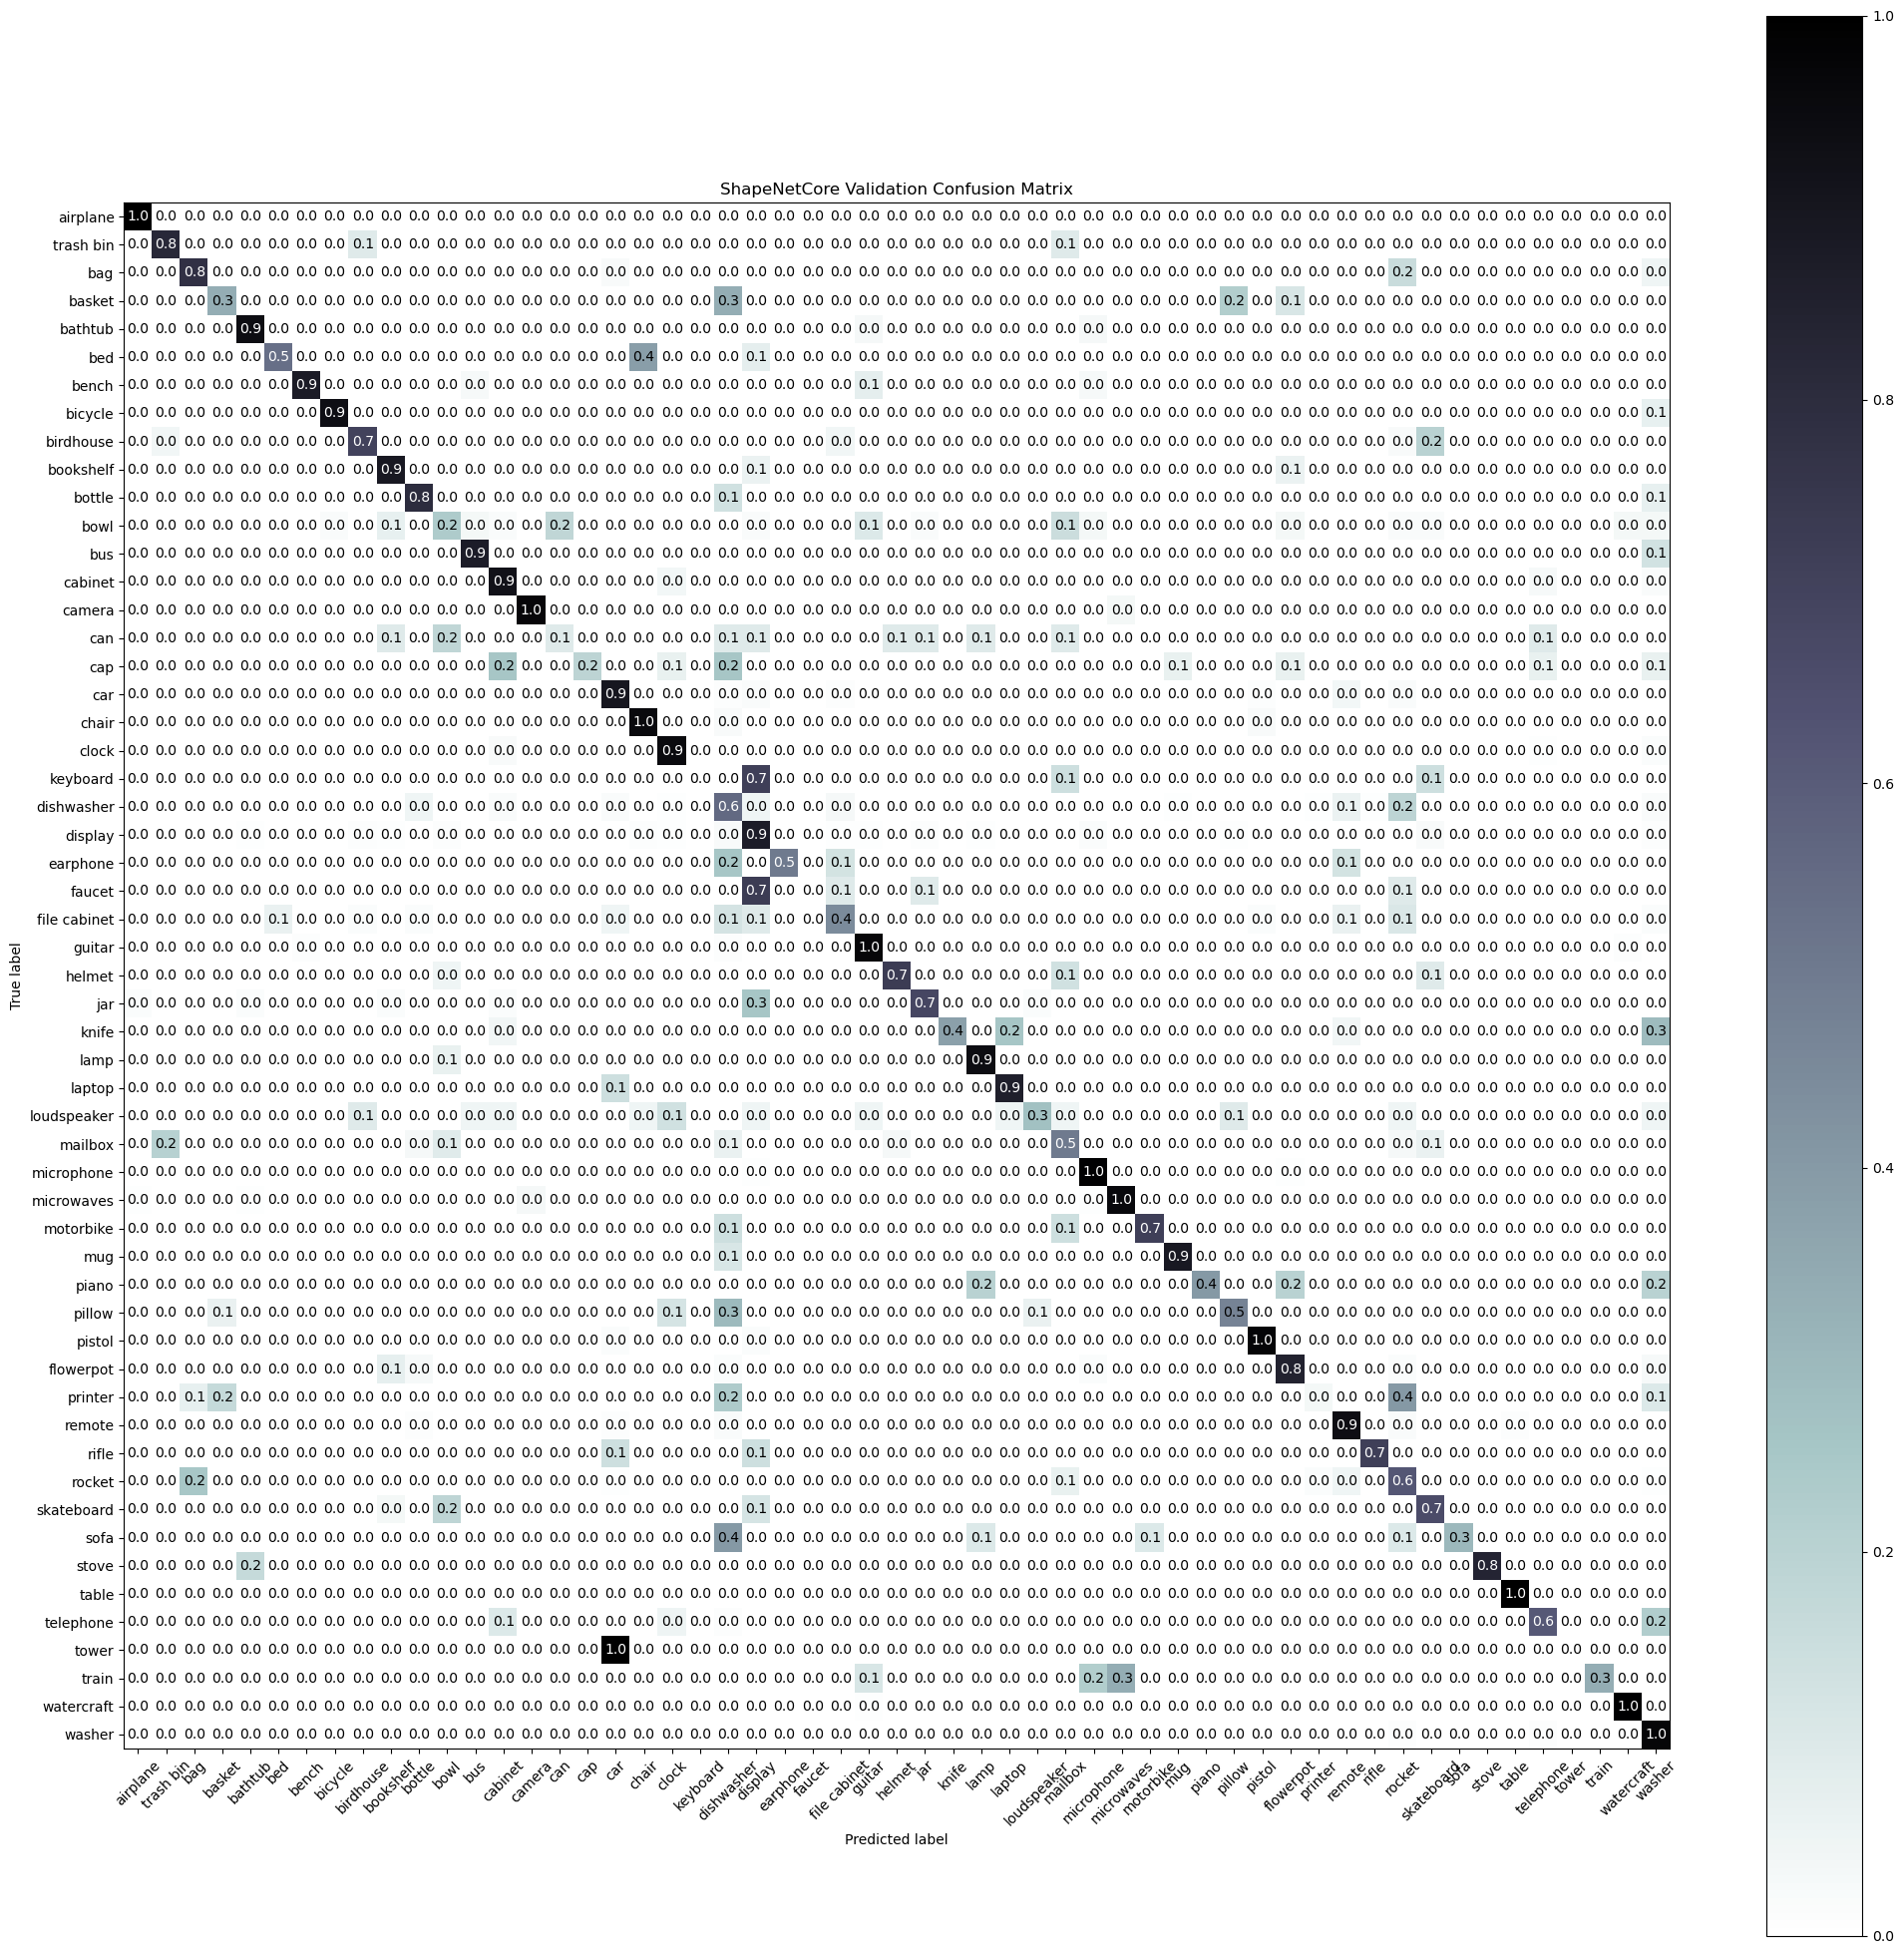

In [191]:
exp2_conf_mtx = np.load(os.path.join(shapenetcore_exp2, best_result, confusion_matrix))
exp2_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = exp2_conf_mtx, display_labels = shapenetcore_keys)
exp2_cm_display.plot(cmap='bone_r',values_format='.1f',xticks_rotation=45)
plt.rcParams['figure.figsize'] = [25, 25]
plt.title('ShapeNetCore Validation Confusion Matrix')
plt.show()

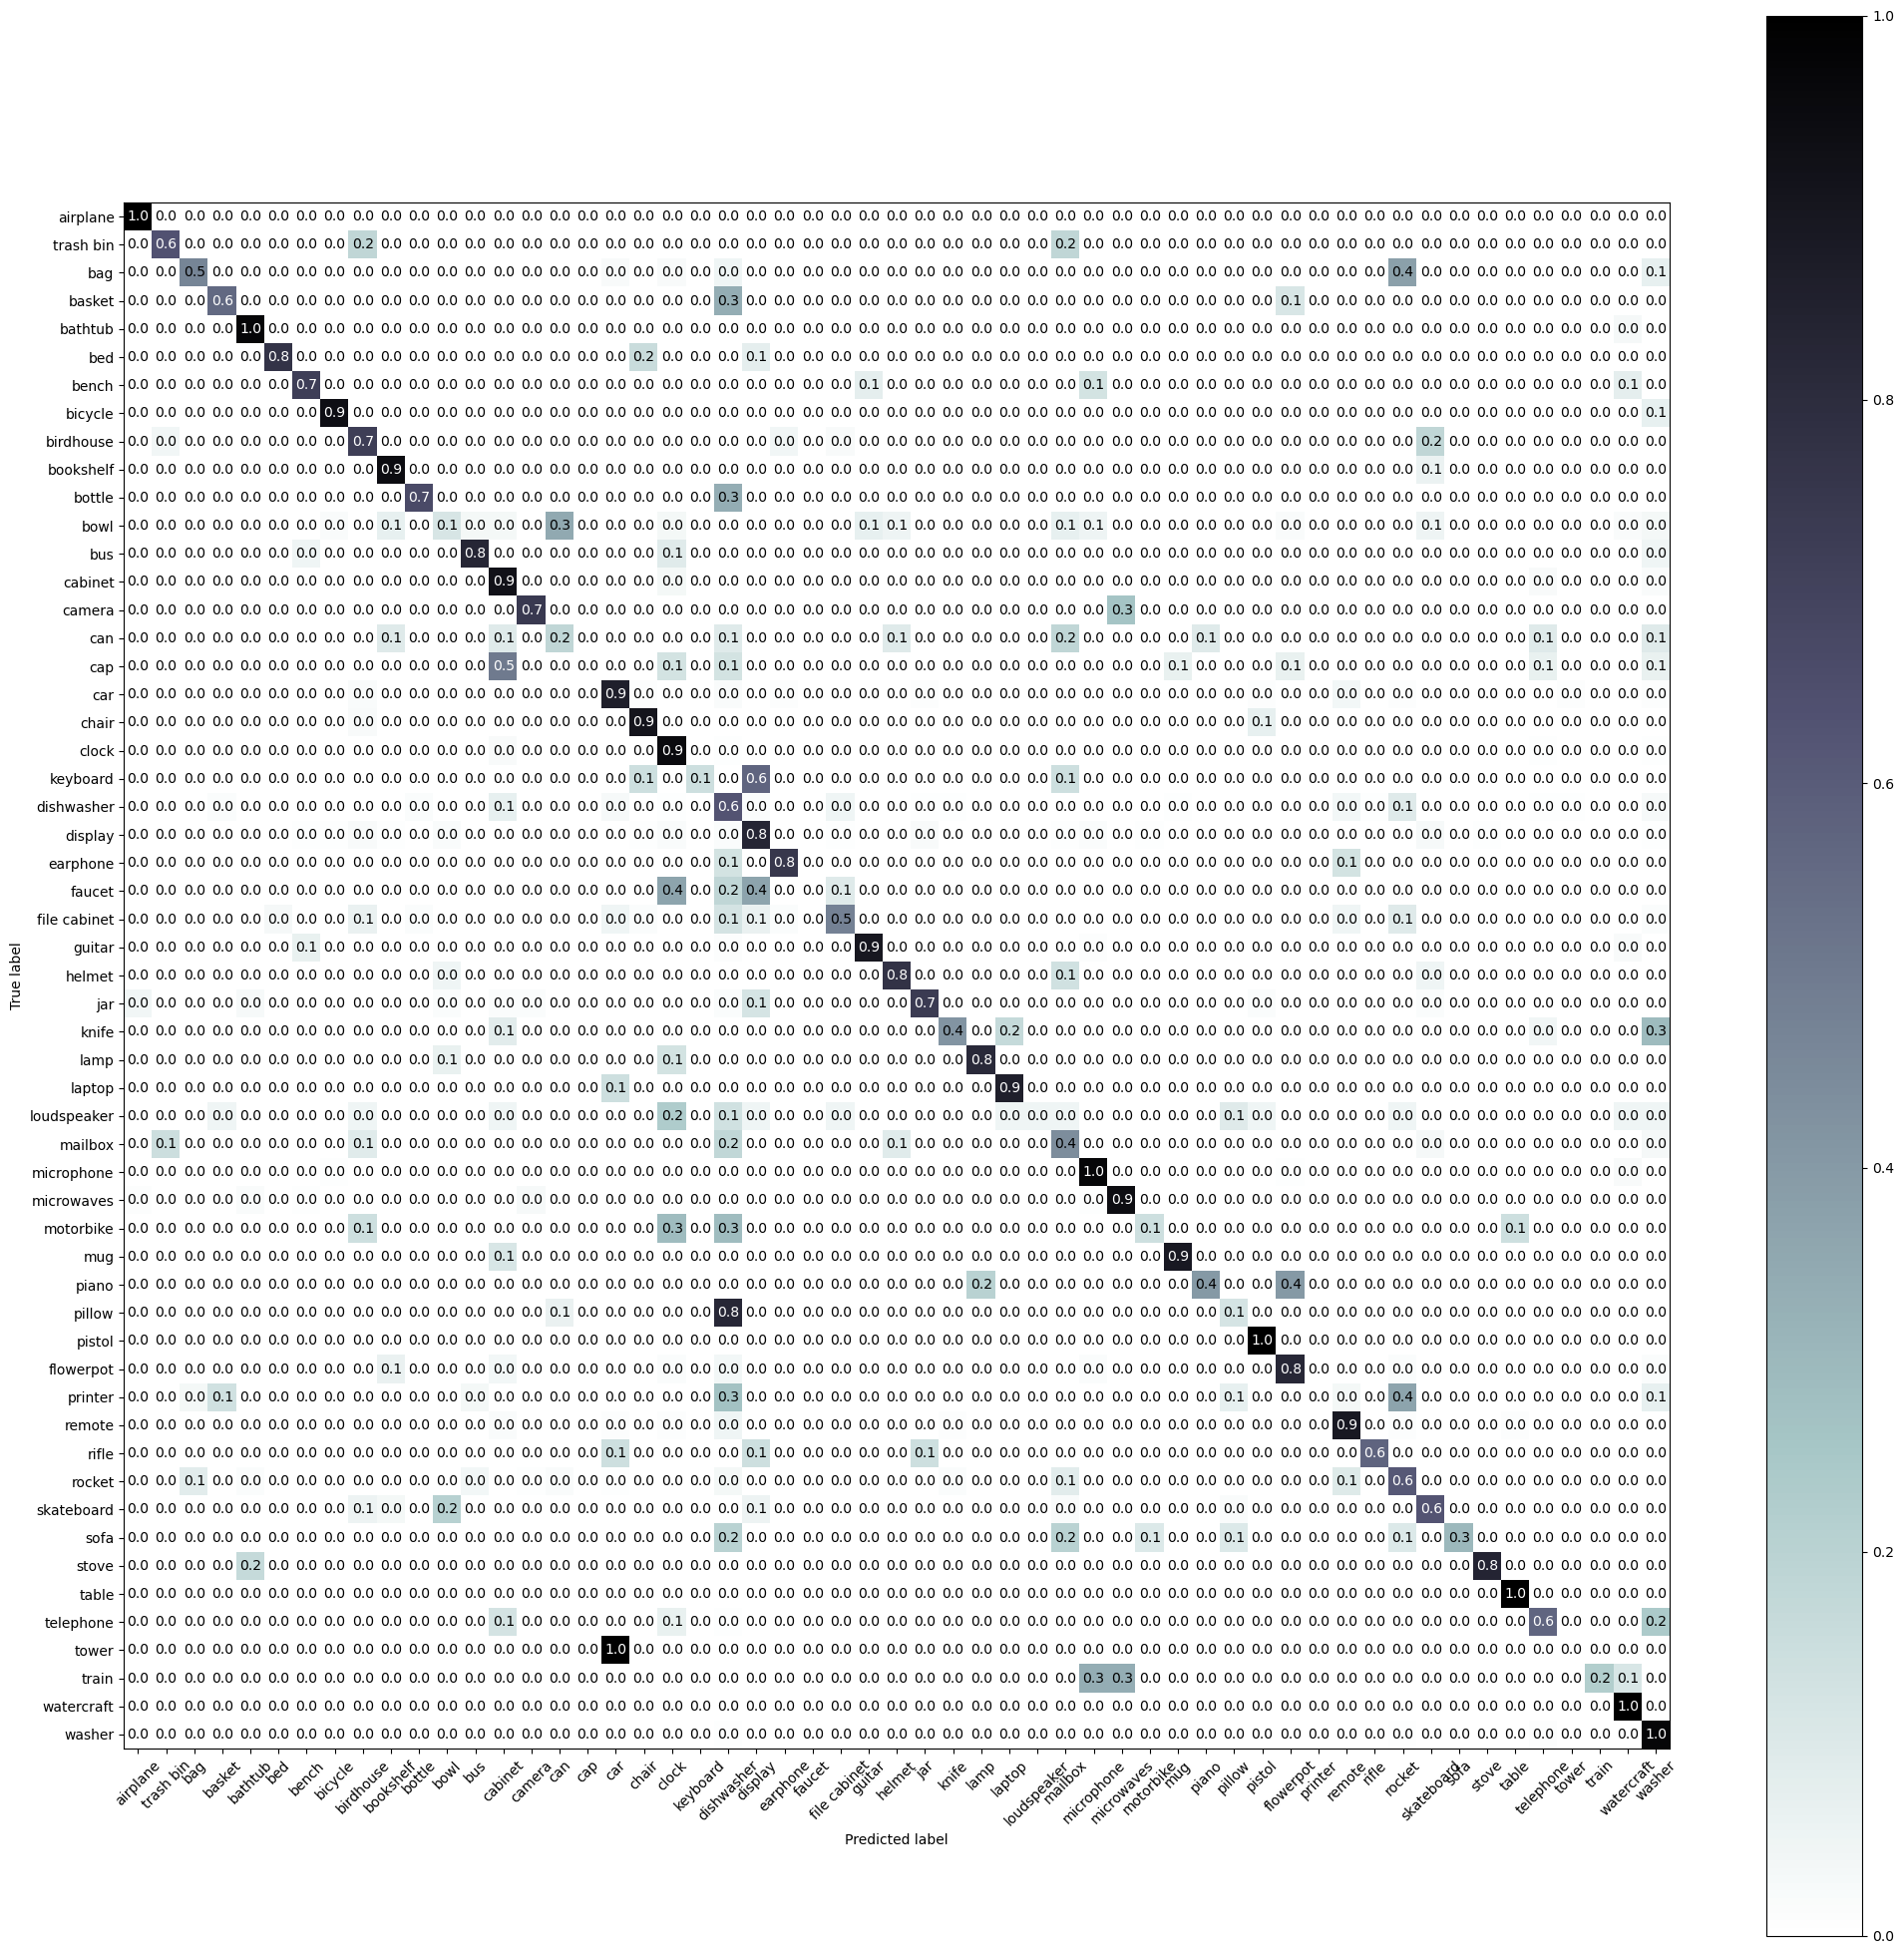

In [27]:
exp3_conf_mtx = np.load(os.path.join(shapenetcore_exp3, best_result, confusion_matrix))
exp3_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = exp3_conf_mtx, display_labels = shapenetcore_keys)
exp3_cm_display.plot(cmap='bone_r',values_format='.1f',xticks_rotation=45)
plt.rcParams['figure.figsize'] = [25, 25]
plt.show()

## Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


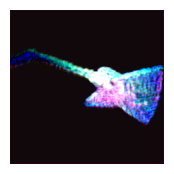

In [59]:
img1 = np.load('../imgs/img_16.npy')
plt.imshow(np.moveaxis(img1[6],0,2))
plt.axis('off')
plt.rcParams['figure.figsize'] = [2, 2]
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

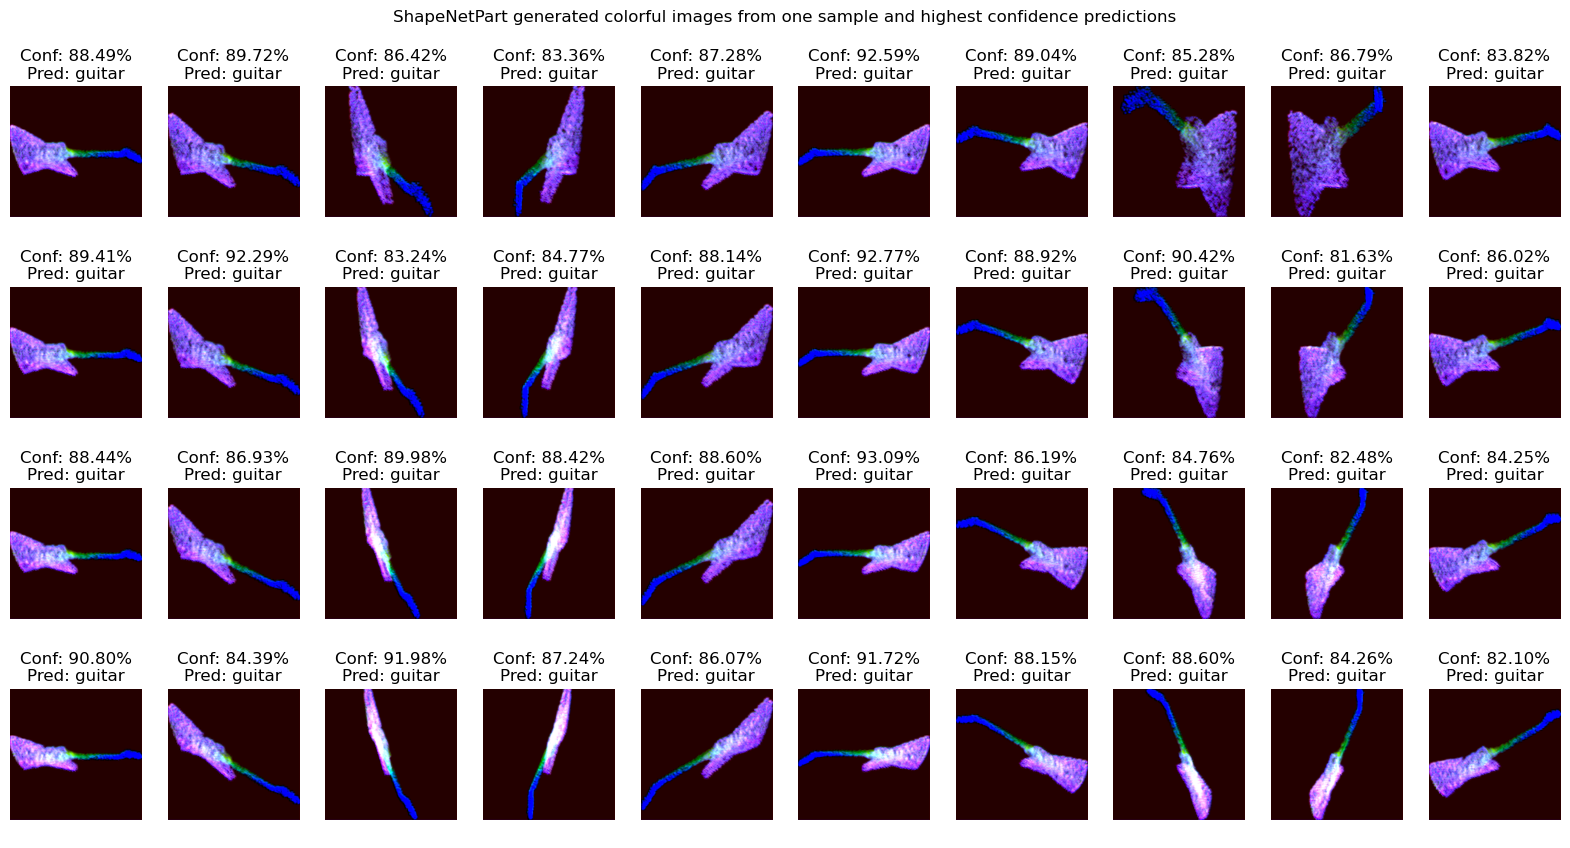

In [208]:
# create figure
fig = plt.figure(figsize=(20, 10))
  
# setting values to rows and column variables
rows = 4
columns = 10

sample = 6

all_conf = np.load(os.path.join(shapenetpart_exp4, result_1, all_confidence))
all_pred = np.load(os.path.join(shapenetpart_exp4, result_1, all_predictions))

plt.title("ShapeNetPart generated colorful images from one sample and highest confidence predictions", y=1.05)
plt.axis('off')

# reading images
for i in range(4):
    for j in range(10):
        pos = 10*i+j
        img = np.load(os.path.join(shapenetpart_exp4, result_1, 'imgs/img_{}.npy'.format(pos)))
        fig.add_subplot(rows, columns, pos+1)
        plt.imshow(np.moveaxis(img[sample],0,2))
        plt.axis('off')
        plt.title("Conf: {:.2%}\nPred: {}".format(all_conf[sample,pos], shapenetpart_keys[all_pred[sample,pos]]))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

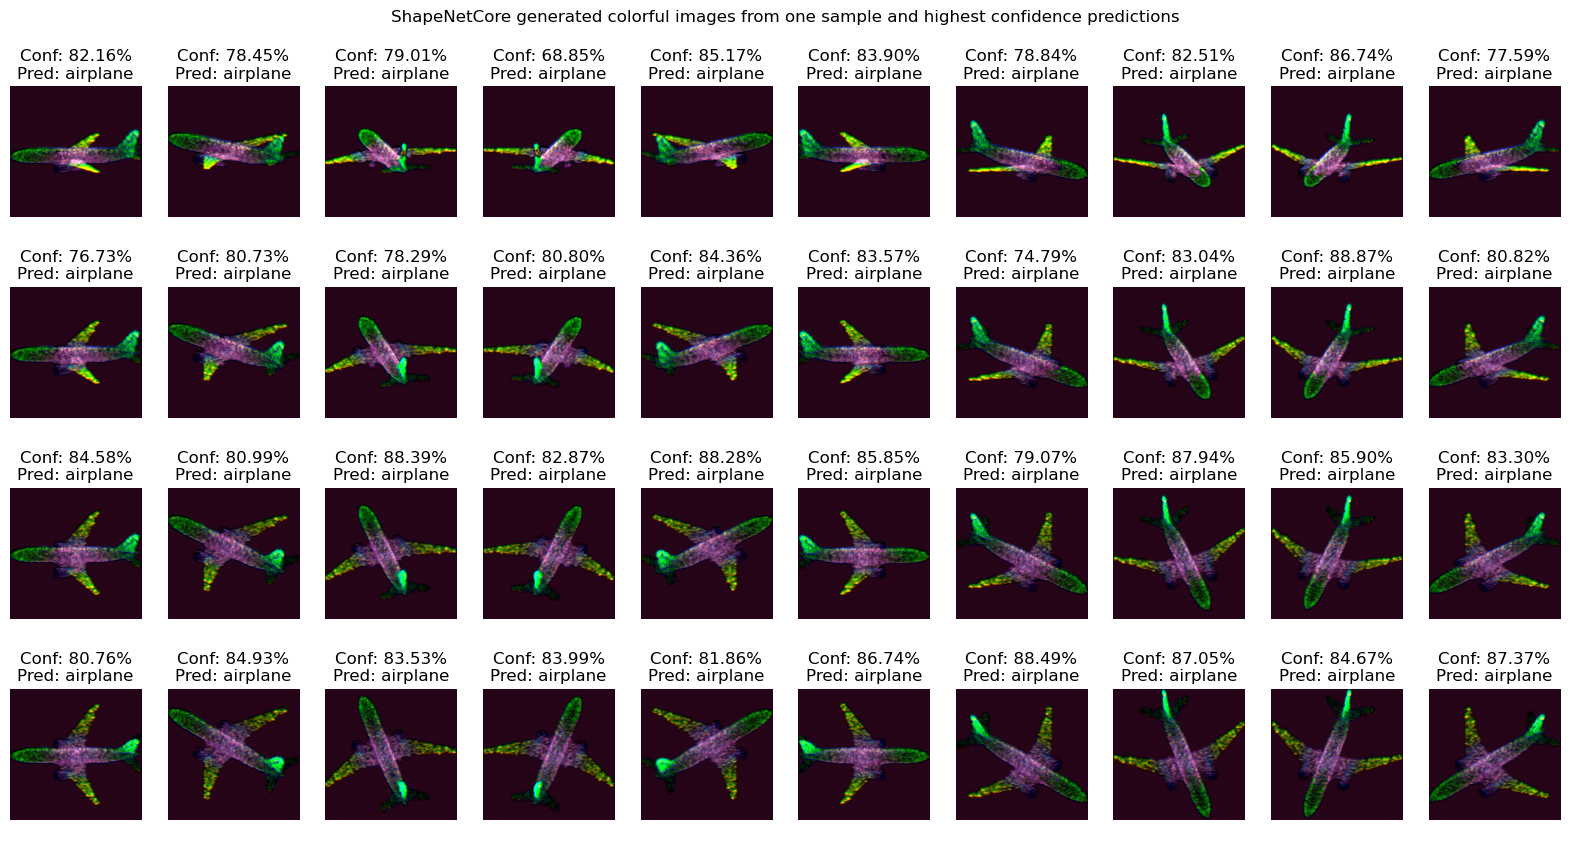

In [209]:
# create figure
fig = plt.figure(figsize=(20, 10))
  
# setting values to rows and column variables
rows = 4
columns = 10

sample = 7

all_conf = np.load(os.path.join(shapenetcore_exp2, result_1, all_confidence))
all_pred = np.load(os.path.join(shapenetcore_exp2, result_1, all_predictions))

plt.title("ShapeNetCore generated colorful images from one sample and highest confidence predictions", y=1.05)
plt.axis('off')

# reading images
for i in range(4):
    for j in range(10):
        pos = 10*i+j
        img = np.load(os.path.join(shapenetcore_exp2, result_1, 'imgs/img_{}.npy'.format(pos)))
        fig.add_subplot(rows, columns, pos+1)
        plt.imshow(np.moveaxis(img[sample],0,2))
        plt.axis('off')
        plt.title("Conf: {:.2%}\nPred: {}".format(all_conf[sample,pos], shapenetcore_keys[all_pred[sample,pos]]))